In [1]:
import models
import torch
import models_utils

2025-09-16 05:27:14.164 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 05:27:14.302 
  command:

    streamlit run c:\Users\MariusPC\.conda\envs\PythonAllInOne\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-16 05:27:14.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-16 05:27:14.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using Device:",device)
torch.set_default_device(device)

SKILLSET_LABELS = ["AIM", "STREAM", "ALT", "TECH", "SPEED", "RHYTHM"]
NUM_CLASSES = len(SKILLSET_LABELS)
INPUT_DIM = 12
MAX_SEQ_LEN = 124
BATCH_SIZE = 16

Using Device: cuda


In [3]:
model = models.SkillsetClassifier_v2_1(MAX_SEQ_LEN, NUM_CLASSES)


#loads model weights
PATH = "model_weights/osu_skills_v2.pth"
model.load_state_dict(torch.load(PATH,weights_only=True))
_ = model.eval()

In [4]:
beatmap = models_utils.get_beatmap_from_website(62001)
models_utils.visualize_beatmap_skillsets(model, beatmap, False)

KeyboardInterrupt: 

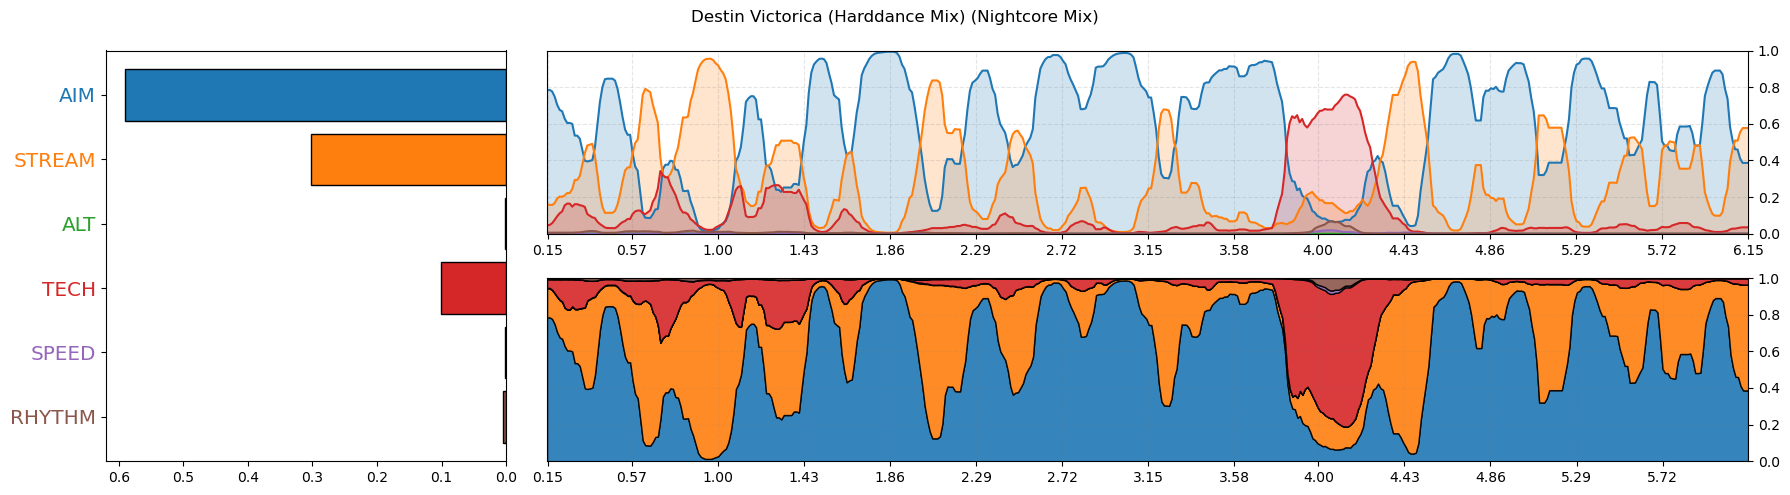

In [ ]:
beatmap = models_utils.get_beatmap_from_website(4966899)
models_utils.visualize_beatmap_skillsets(model, beatmap, False)

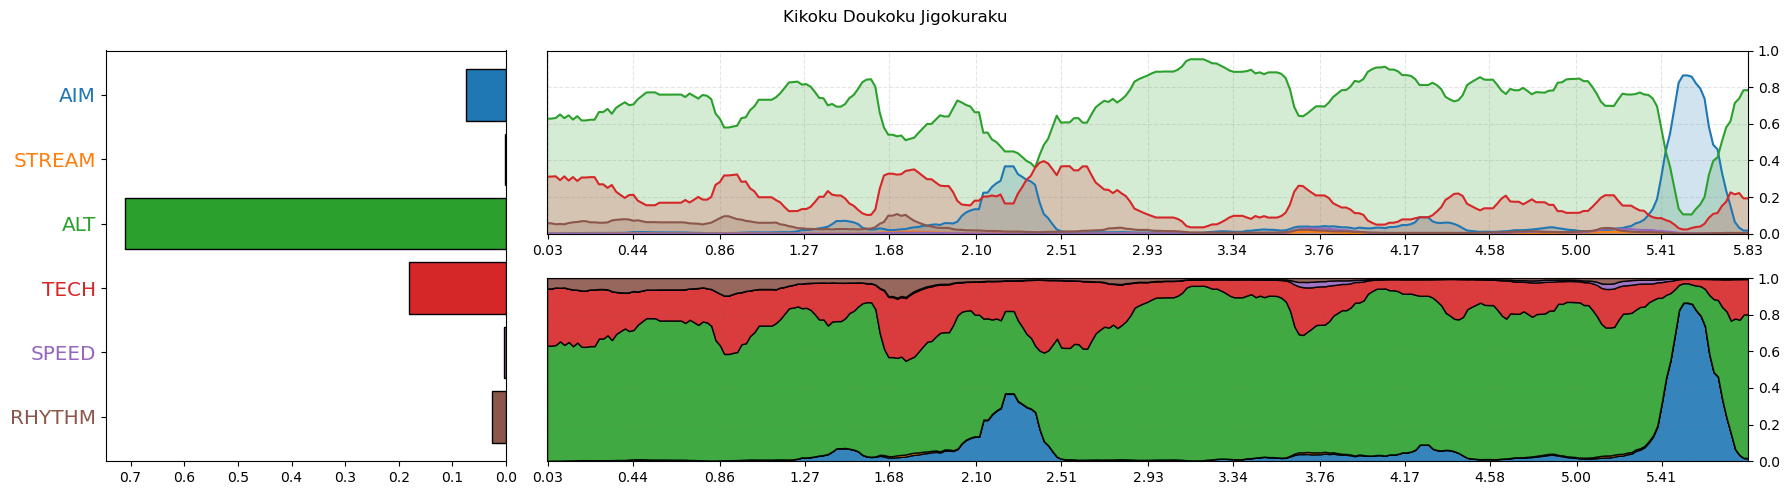

In [ ]:
beatmap = models_utils.get_beatmap_from_website(942356)
models_utils.visualize_beatmap_skillsets(model, beatmap, False)

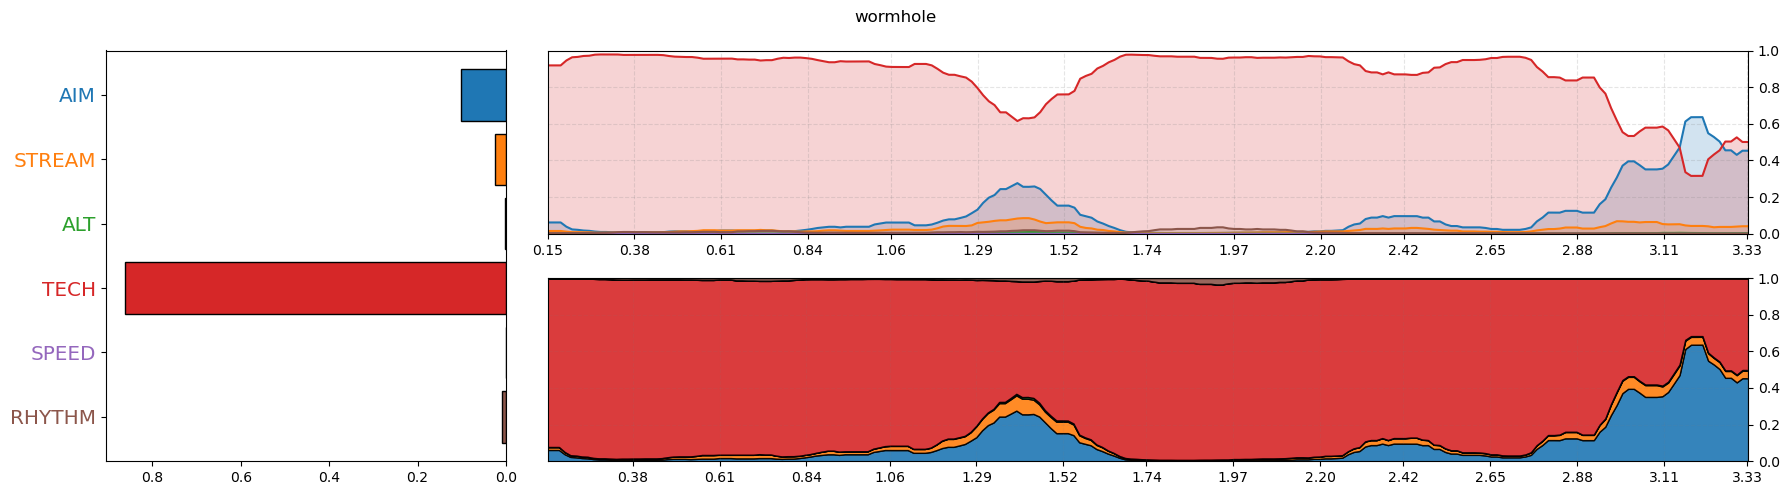

In [ ]:
beatmap = models_utils.get_beatmap_from_website(4027941)
models_utils.visualize_beatmap_skillsets(model, beatmap, False)

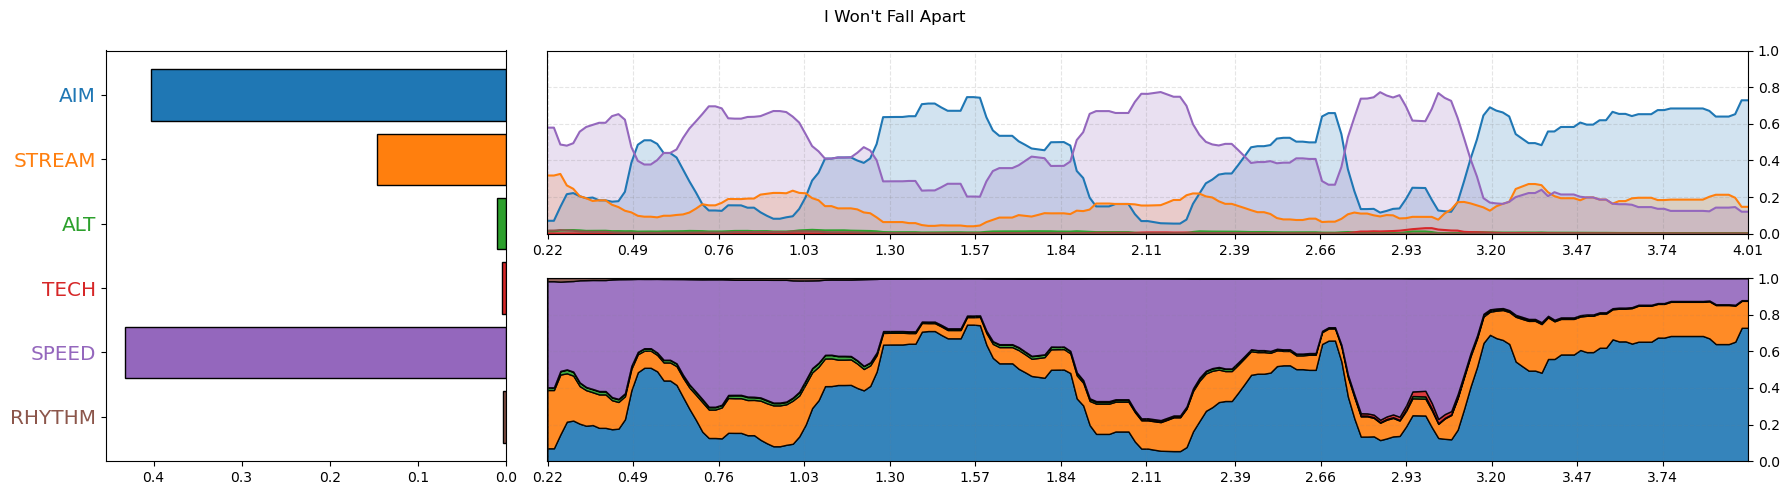

In [ ]:
beatmap = models_utils.get_beatmap_from_website(1058295)
models_utils.visualize_beatmap_skillsets(model, beatmap, True)

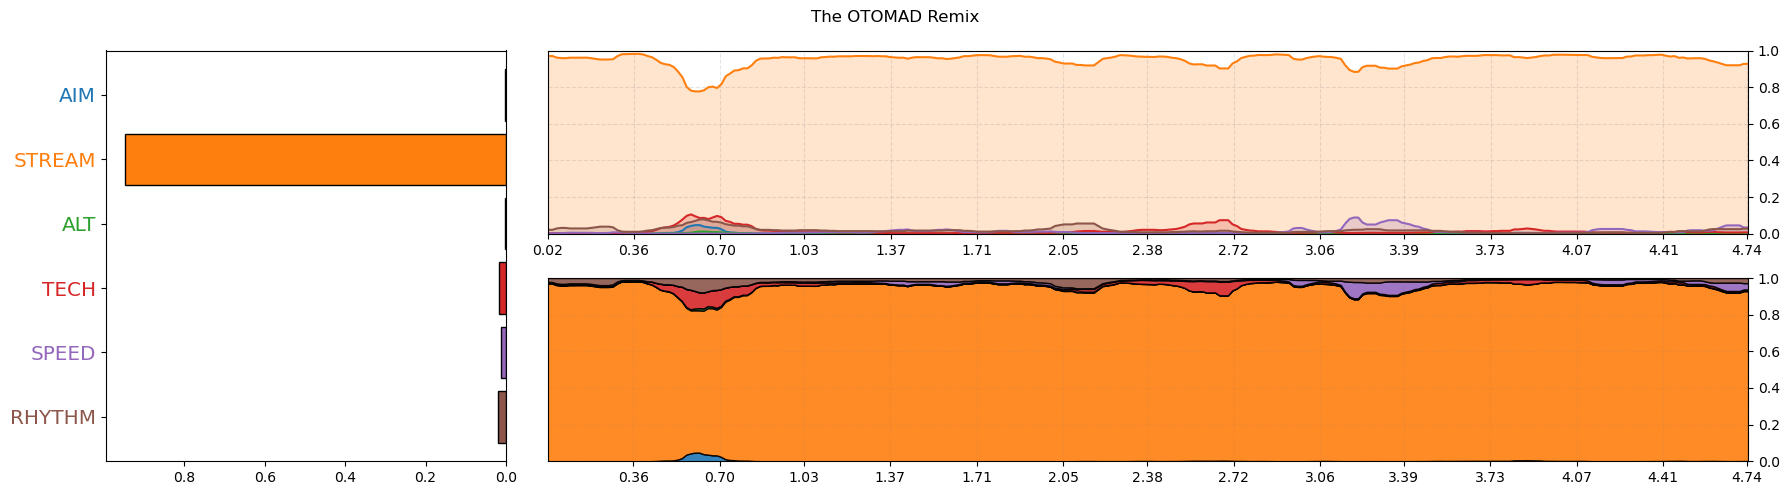

In [ ]:
beatmap = models_utils.get_beatmap_from_website(317460)
models_utils.visualize_beatmap_skillsets(model, beatmap, dt=False)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as f

#Sample Data

SKILLSET_LABELS = ["AIM", "STREAM", "ALT", "TECH", "SPEED", "RHYTHM"]
skillvaluespread = np.random.random((60, len(SKILLSET_LABELS)))
sm = nn.Softmax(dim=-1)
skillvaluespread = sm(torch.tensor(skillvaluespread)).cpu().numpy()
totals = np.sum(skillvaluespread, axis=0) / np.sum(skillvaluespread)
b_time = np.linspace(0, 100, len(skillvaluespread))
bottom = np.zeros(len(b_time))

(60, 6)


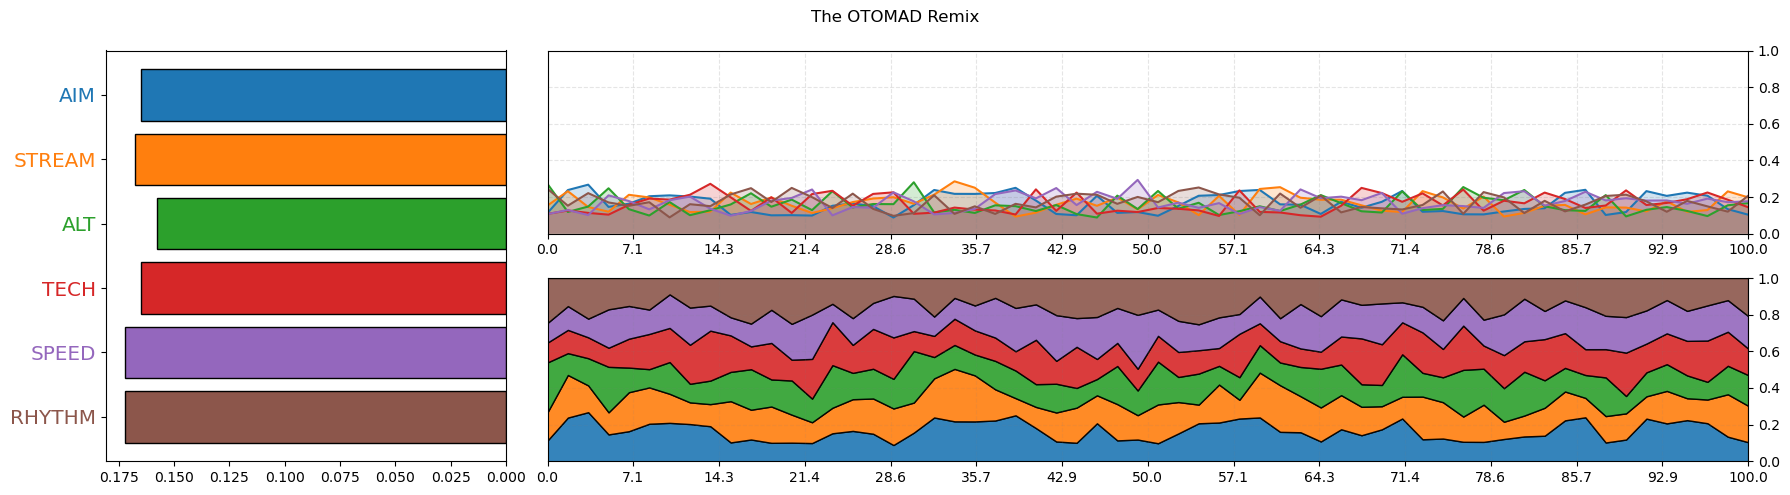

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def visualize(bottom, skillvaluespread, b_time, totals):
    cmap = plt.get_cmap("tab10")
    colors = [cmap(i) for i in range(len(SKILLSET_LABELS))]

    fig = plt.figure(figsize=(18, 5))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 3])
    fig.suptitle(beatmap.metadata.title)

    ax1 = fig.add_subplot(gs[0, 1])
    ax1.grid(color="gray", linestyle="--", alpha=0.2)
    ax1.margins(x=0, y=0)
    ax1.set_ylim(0,1)

    for i,la in enumerate(SKILLSET_LABELS):
        ax1.plot(b_time,skillvaluespread[:,i], label=la)
        ax1.fill_between(b_time, skillvaluespread[:,i],bottom, alpha=0.2)
    ax1.set_xticks((np.linspace(min(b_time),max(b_time),15)).round(2))
    ax1.yaxis.set_label_position("right")
    ax1.yaxis.tick_right()

    ax2 = fig.add_subplot(gs[1, 1])
    ax2.stackplot(b_time,
                       skillvaluespread[:,0],skillvaluespread[:,1],skillvaluespread[:,2],skillvaluespread[:,3],
                       skillvaluespread[:,4],skillvaluespread[:,5],
                       labels=SKILLSET_LABELS, baseline="zero", alpha=0.9, edgecolor="black", linewidth=1)
    ax2.set_xticks((np.linspace(min(b_time),max(b_time),15)).round(2))
    ax2.grid(color="gray", linestyle="--", alpha=0.1)
    ax2.margins(x=0, y=0)
    ax2.yaxis.set_label_position("right")
    ax2.yaxis.tick_right()

    ax3 = fig.add_subplot(gs[:, 0])
    print(skillvaluespread.shape)
    ax3.barh(y=SKILLSET_LABELS, width=np.sum(skillvaluespread, axis=0)/np.sum(skillvaluespread), color=colors, edgecolor="black")
    ax3.invert_yaxis()
    ax3.invert_xaxis()
    yticklabels = ax3.get_yticklabels()
    for label, color in zip(yticklabels, colors):
        label.set_color(color)
        label.set_fontsize('x-large')
    #ax3.yaxis.set_label_position("right")
    #ax3.yaxis.tick_right()

    plt.tight_layout()
    plt.show()
visualize(bottom, skillvaluespread, b_time, totals)

In [ ]:
"DT_AIM"[3:]

'AIM'